In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Function: f(x) = x2  + 10sinx

In [3]:
def f(x):
    return x**2 + 10*np.sin(x)

In [4]:
x = np.linspace(-10,10,51)
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [5]:
y = f(x)
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

<IPython.core.display.Javascript object>


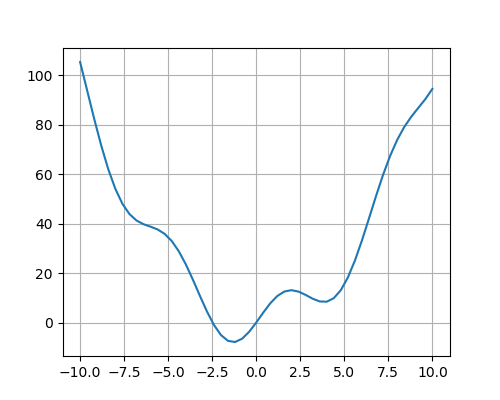

In [11]:
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y)
plt.grid('on')
plt.show()

In [13]:
import scipy.optimize as opt

Find minimum of the function using BFGS method with starting intial point x0= 0

In [14]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f, #objective function to be minimized
                 x0 = 0, #intial guess
                 maxiter = 2000, #maximum number of itterations to perform
                 full_output = True) #Returns fopt, func_calls, grad_calls, and warnflag


Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


In [15]:
xopt

array([-1.30644012])

In [16]:
fopt

-7.945823375615215

<IPython.core.display.Javascript object>


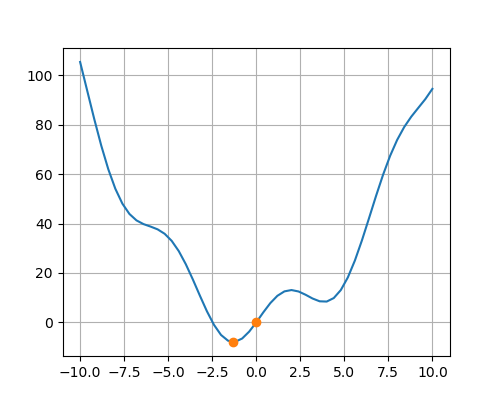

In [20]:
x0 = 0
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid('on')
plt.show()

What if we started from x0 = 6? We will get a different local minimum not global min

In [21]:
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f, #objective function to be minimized
                 x0 = 6, #intial guess
                 maxiter = 2000, #maximum number of itterations to perform
                 full_output = True) #Returns fopt, func_calls, grad_calls, and warnflag


Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8


In [23]:
xopt

array([3.83746709])

In [24]:
fopt

8.315585579477458

<IPython.core.display.Javascript object>


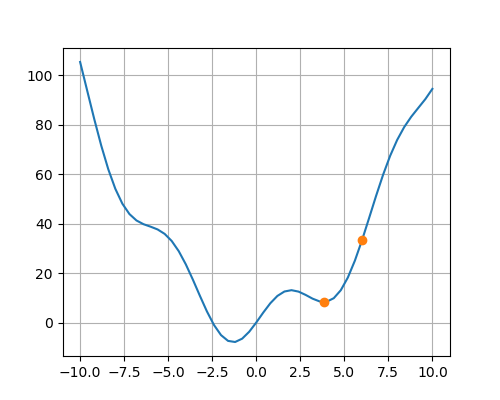

In [25]:
x0 = 6
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y)
plt.plot([x0, xopt], [f(x0), fopt], 'o')
plt.grid('on')
plt.show()

Therefore we have another method which is better at finding the global minimum

basinhopping method:

In [27]:
res = \
    opt.basinhopping(f, 
                     x0 = 6,
                    T = 1, #the 'temperature' parameter
                    stepsize = 2) #Initial step size
res

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08586408]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.30644])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1809
                        nit: 100
                       njev: 603
                          x: array([-1.30644])

<IPython.core.display.Javascript object>


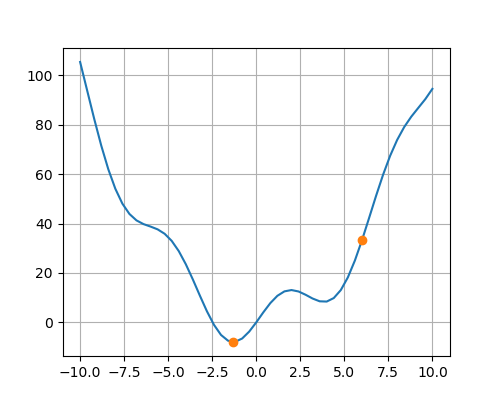

In [28]:
x0 = 6
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y)
plt.plot([x0, res.x], [f(x0), res.fun], 'o')
plt.grid('on')
plt.show()

Finding Roots of an equation: Solving f(x) = 0
f(x) = x2 + 10*sin(x) = 0

In [29]:
x0 = 1 # starting from initial point of 1
xopt = opt.fsolve(f, x0)
xopt

array([0.])

<IPython.core.display.Javascript object>


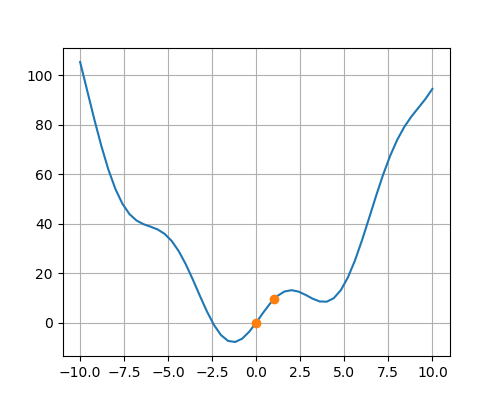

In [30]:
x0 = 1
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid('on')
plt.show()

In [31]:
x0 = -3
xopt = opt.fsolve(f, x0)
xopt

array([-2.47948183])

<IPython.core.display.Javascript object>


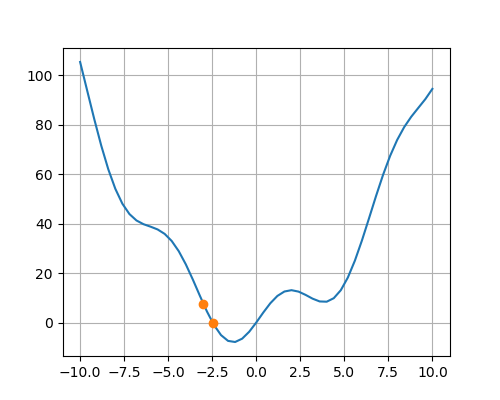

In [33]:
x0 = -3 #we get a different solution if we start from a different point
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y)
plt.plot([x0, xopt], [f(x0), f(xopt)], 'o')
plt.grid('on')
plt.show()

Curve fitting is procedure for finding best fitting curve by minimizing the sum of sqaured errors (or residuals) of the points from the curve using the scipy library function 

In [34]:
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [35]:
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

<IPython.core.display.Javascript object>


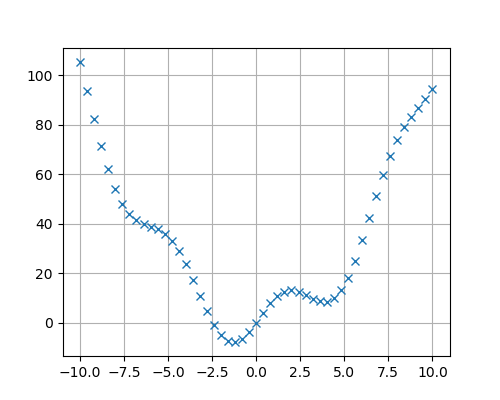

In [36]:
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y, 'x')
plt.grid('on')
plt.show()

In [37]:
ynoise = y + 5*np.random.randn(x.size)
ynoise

array([105.16160864,  79.69563636,  70.66206119,  65.7920333 ,
        67.81231152,  56.17064233,  44.79328936,  52.35800044,
        37.35558458,  41.07179893,  34.42992592,  32.8338646 ,
        30.62276912,  27.1180523 ,  22.20050571,  28.38188283,
         8.49206108,  15.92568602,  -3.77149556,  -3.00801056,
        -6.85634874,  -3.92791648, -12.47397243,  -8.94506368,
        -5.81769664,   2.02268623,   5.94976004,  12.93328698,
         7.60847547,  18.57710958,  21.44285789,   7.85677414,
        15.20932806,   7.82271353,  13.03208636,  10.75754576,
        14.11590485,   8.80727431,  22.18113049,  28.41028992,
        28.31246372,  47.3665623 ,  47.93618977,  58.51545913,
        63.78729951,  71.14314553,  76.41073264,  77.22941562,
        76.49006674,  90.08058363,  95.6440894 ])

<IPython.core.display.Javascript object>


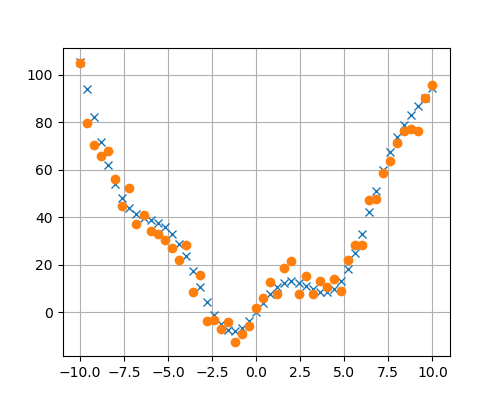

In [38]:
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y, 'x')
plt.plot(x,ynoise, 'o')
plt.grid('on')
plt.show()

In [44]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)
    

In [45]:
guess = [2,2] #starting guess for the parameter a and b for fitting the best curve
params, cov = opt.curve_fit(f2, x, ynoise, guess)
params

array([0.95825111, 8.81084688])

In [46]:
a = params[0]
b = params[1]
y_fit = f2(x,a,b)
y_fit

array([100.61839803,  89.84838917,  79.14252532,  69.05335038,
        60.08445843,  52.61098723,  46.82039228,  42.68285169,
        39.9559744 ,  38.2230684 ,  36.95892725,  35.6127486 ,
        33.6950938 ,  30.85515948,  26.93616171,  22.00008872,
        16.31791429,  10.32681704,   4.56115943,  -0.43187624,
        -4.17867594,  -6.35396711,  -6.83217207,  -5.70723396,
        -3.27778521,   0.        ,   3.58442556,   6.93379539,
         9.59193527,  11.26021281,  11.84468485,  11.47092907,
        10.46421802,   9.29816576,   8.51995456,   8.66394691,
        10.16732139,  13.30105181,  18.12712641,  24.48876122,
        32.03515291,  40.27686279,  48.66308855,  56.66862373,
        63.87677632,  70.04515527,  75.14393867,  79.36058203,
        83.07022313,  86.77645602,  91.03182461])

<IPython.core.display.Javascript object>


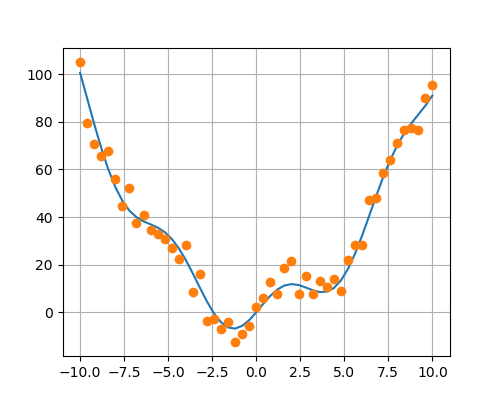

In [47]:
fig = plt.figure(figsize= (5,4), dpi = 80)
plt.plot(x,y_fit)
plt.plot(x,ynoise, 'o')
plt.grid('on')
plt.show()